In [1]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [2]:
ids, ty, x, y, z, vx, vy, vz, m = np.loadtxt('../data/level_5_halo_24_snapshot_63_data.txt',  \
                                             dtype=[('f0', '<i8'), ('f1', '<i8'), ('f2', '<f8'), \
                                                    ('f3', '<f8'), ('f4', '<f8'), ('f5', '<f8'), \
                                                    ('f6', '<f8'), ('f7', '<f8'), ('f8', '<f8')], unpack = True)

In [3]:
rxy = np.sqrt(x**2 + y**2)
rxyz = np.sqrt(x**2 + y**2 + z**2)

In [4]:
def dens_3d(r0, r1, mass):
    if r1 > r0:
        rdiff = (1000. * r1)**3 - (1000. * r0)**3
    else:
        rdiff = (1000. * r0)**3 - (1000. * r1)**3        
    vol = 4./3. * np.pi * rdiff
    dens = mass/vol
    return dens
    

In [5]:
def binning(r_vec, num = 50, scale = 'log'):
    r_min = np.min(r_vec)
    r_max = np.max(r_vec)
    #r_max = 0.1
    if r_min == 0.0:
        r_vec = r_vec[r_vec != r_min]
        r_min = np.min(r_vec)
        print(r_min)
    if scale == 'lin':
        r = np.linspace(r_min, r_max, num = num)
    elif scale == 'log':
        r = np.geomspace(r_min, r_max, num = num)
    else:
        sys.exit('Binning scale not yet defined.')
    return r


In [6]:
r_bins = binning(rxy)
bin_ind = np.digitize(rxy, r_bins)

7.0108847443e-06


In [7]:
mass_arr = []
dens_arr = []
for j in range (50):
    mass_arr.append(np.sum(m[bin_ind == j+1]))
    if j < 49:
        dens_arr.append(dens_3d(r_bins[j], r_bins[j+1], mass_arr[j]))
    elif j == 49:
        dens_arr.append(dens_3d(r_bins[j], 2*np.max(rxy), mass_arr[j]))

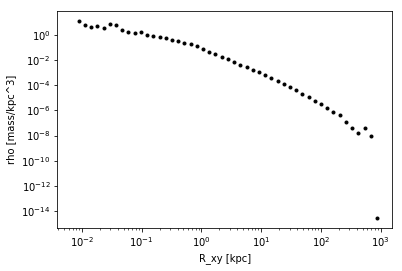

In [9]:
plt.loglog(1000*r_bins, dens_arr, 'k.')
plt.xlabel('R_xy [kpc]')
plt.ylabel('rho [mass/kpc^3]')
plt.show()
#plt.plot(1000*r_bins, dens_arr, 'k.')